# 图像处理实验Week01

## 实验目的

1. 对一幅灰度图像进行线性点运算，并输出相应的图像
2. 将两幅彩色图像分别转换为灰度图像。进一步地，对得到的两幅灰度图像进行加运算，并输出相应的图像。

## 实验环境

### PIL

Python Imaging Library (PIL) 是一个强大的图像处理库，支持多种图像格式的读取、处理与保存，包括常见的图像操作如裁剪、旋转和色彩转换等。由于PIL的主分支已经停止维护，这里我们选用Pillow。选择PIL是因为它提供了丰富的图像处理功能，易于使用且兼容性强，适合处理各种图像任务，并且之后使用torch时格式转换可以更加方便。

### NumPy

NumPy是一个开源的Python科学计算包，主要用于多维数组（矩阵）的操作，它提供了一套强大的数学函数来操作数组数据。而图像实际上就是单通道或3通道的多维数组，NumPy与Pillow结合使用，可以轻松地将图像转换为数组形式进行高效的数学运算，然后再将数组转换回图像格式。

In [50]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

## 实验方法

### 灰度图线性点运算

灰度图$f(x,y)$可以表示为$m\times n$的矩阵$(p_{ij})$。其线性点运算即为对每个矩阵元进行线性运算：
$$q_{ij}=a\cdot p_{ij}+b$$
在NumPy中，利用矩阵的广播性质，可以写为：
$$Q=a\cdot P+b$$
先将PIL图像转化为NumPy数组，变换后再转回PIL图像，可以写出如下函数：

In [51]:
def linear_transformation(img: Image.Image, a: float|int, b: float|int) -> Image.Image:
    """
    Apply linear transformation to an image.

    Args:
        img (Image.Image): The input image.
        a (float | int): The scaling factor.
        b (float | int): The offset.

    Returns:
        Image.Image: The transformed image.
    """
    img = np.array(img)
    img = a * img + b
    img = Image.fromarray(img)
    return img

### RGB转灰度图

使用PIL图片的`convert('L')`方法可以直接将RGB图像转化为灰度图。其内部原理为，对每一个像素点，按一定权重将三个通道混合得到灰度值。根据NTSC（National Television System Committee）颜色模型，该加权和为：$$y=0.299r+0.587g+0.114b$$

### 灰度图加运算

灰度图$f(x,y)$可以表示为$m\times n$的矩阵$(p_{ij})$。其加运算即为对每个矩阵元进行加运算：
$$r_{ij}=p_{ij}+q_{ij}$$
在NumPy中可以写为：
$$R=P+Q$$
先将PIL图像转化为NumPy数组，变换后再转回PIL图像，可以写出如下函数：

In [52]:
def add_image(image1: Image.Image, image2: Image.Image) -> Image.Image:
    """Add two images pixel by pixel.

    Args:
        image1 (Image.Image): The first image to be added.
        image2 (Image.Image): The second image to be added.

    Returns:
        Image.Image: The resulting image after adding image1 and image2.
    """
    img1 = np.array(image1)
    img2 = np.array(image2)
    img = img1 + img2
    img = Image.fromarray(img)
    return img

## 实验过程与结果

### 灰度图线性点运算
调用函数完成线性点运算，结果如Fig1：

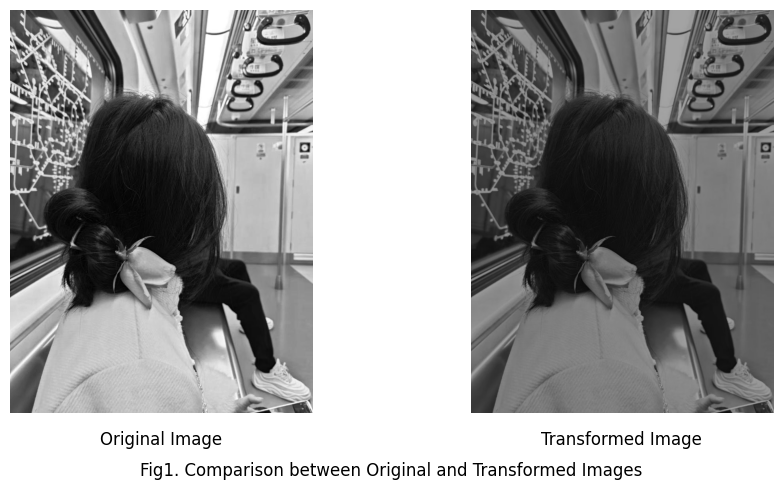

In [53]:
# 读取图像，均为1024*768px
gray_img0 = Image.open('gray_mary0.jpg').convert('L')

# 1.对一幅灰度图像进行线性点运算，并输出相应的图像
linear_img = linear_transformation(gray_img0, 0.6, 10)

# 呈现结果
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
ax[0].imshow(gray_img0, cmap='gray')
ax[0].set_title('Original Image', y=-0.1)
ax[0].axis('off')
ax[1].imshow(linear_img, cmap='gray')
ax[1].set_title('Transformed Image', y=-0.1)
ax[1].axis('off')
fig.suptitle('Fig1. Comparison between Original and Transformed Images', y=0)
plt.tight_layout()
plt.show()

### RGB转灰度图
直接使用`convert('L')`，结果如Fig2：

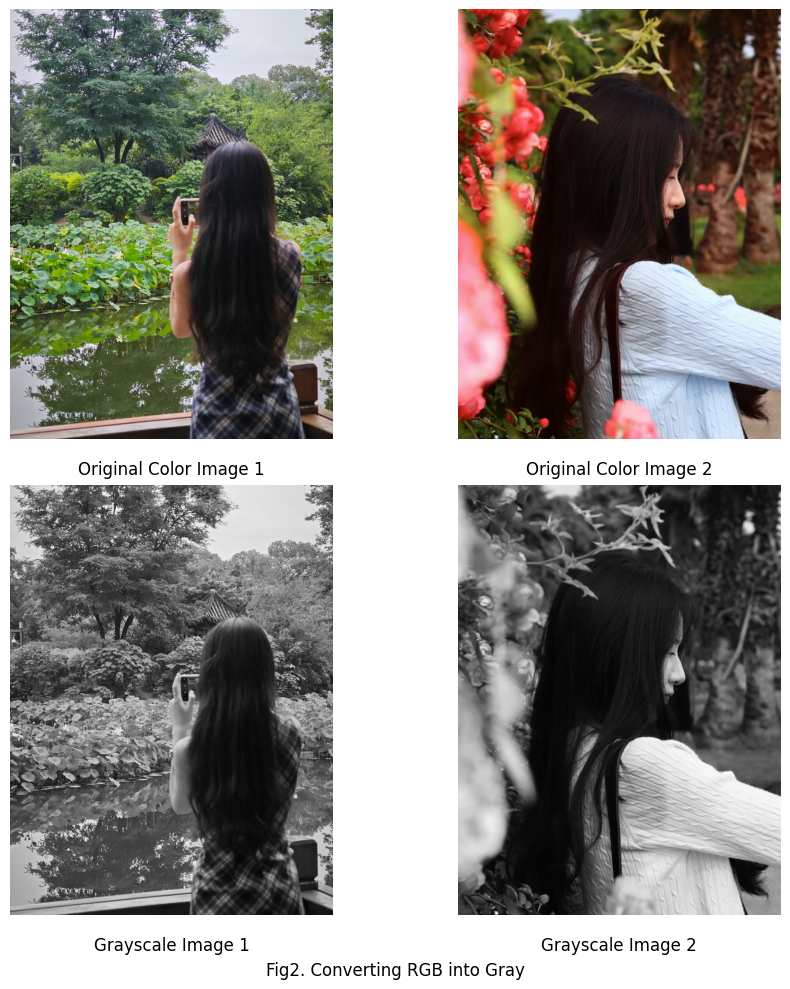

In [54]:
# 读取图像，均为1024*768px
color_img1 = Image.open('color_mary1.jpg').convert('RGB')
color_img2 = Image.open('color_mary2.jpg').convert('RGB')

# 2.1.将两幅彩色图像分别转换为灰度图像
gray_img1 = color_img1.convert('L')
gray_img2 = color_img2.convert('L')

# 呈现结果
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
axs[0, 0].imshow(color_img1)
axs[0, 0].set_title('Original Color Image 1', y=-0.1)
axs[0, 0].axis('off')
axs[1, 0].imshow(gray_img1, cmap='gray')
axs[1, 0].set_title('Grayscale Image 1', y=-0.1)
axs[1, 0].axis('off')
axs[0, 1].imshow(color_img2)
axs[0, 1].set_title('Original Color Image 2', y=-0.1)
axs[0, 1].axis('off')
axs[1, 1].imshow(gray_img2, cmap='gray')
axs[1, 1].set_title('Grayscale Image 2', y=-0.1)
axs[1, 1].axis('off')
fig.suptitle('Fig2. Converting RGB into Gray', y=0)
plt.tight_layout()
plt.show()

### 灰度图加运算

调用函数，结果如Fig3：

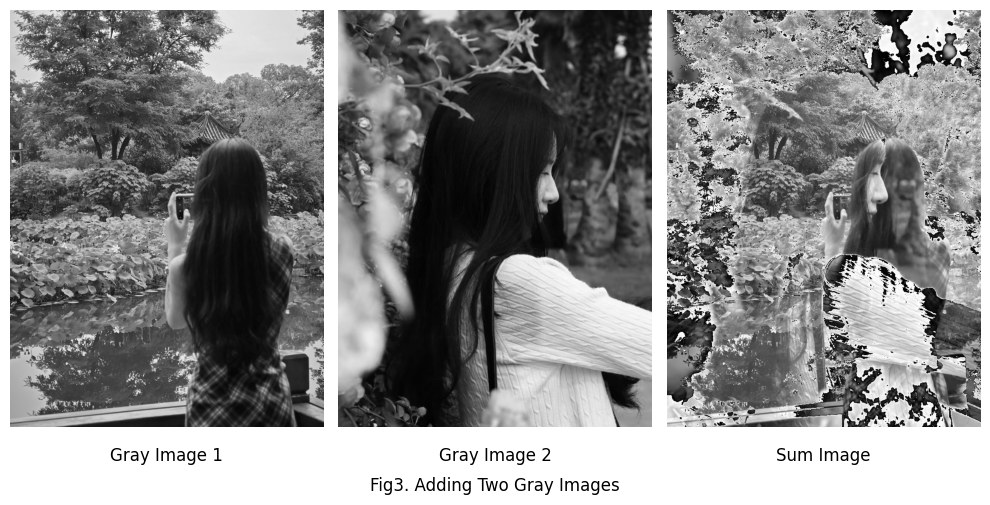

In [57]:
# 2.2.进一步地，对得到的两幅灰度图像进行加运算，并输出相应的图像
sum_img = add_image(gray_img1, gray_img2)

# 呈现结果
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 5))
ax[0].imshow(gray_img1, cmap='gray')
ax[0].set_title('Gray Image 1', y=-0.1)
ax[0].axis('off')
ax[1].imshow(gray_img2, cmap='gray')
ax[1].set_title('Gray Image 2', y=-0.1)
ax[1].axis('off')
ax[2].imshow(sum_img, cmap='gray')
ax[2].set_title('Sum Image', y=-0.1)
ax[2].axis('off')
fig.suptitle('Fig3. Adding Two Gray Images', y=-0.05)
plt.tight_layout()
plt.show()